In [16]:
# 사전 훈련된 단어 임베딩
import os

imdb_dir = "C:\\Users\\tiger\\Deeplearning\\4.IMDB\\aclImdb\\"

train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

In [17]:
train_dir

'C:\\Users\\tiger\\Deeplearning\\4.IMDB\\aclImdb\\train'

In [18]:
for label_type in ['neg','pos']:
    dir_name = os.path.join(train_dir, label_type)
    print(dir_name)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

print(texts[0])
print(labels[0])
print(texts[12500])
print(labels[12500])

C:\Users\tiger\Deeplearning\4.IMDB\aclImdb\train\neg
C:\Users\tiger\Deeplearning\4.IMDB\aclImdb\train\pos
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.
0
Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality tha

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.'% len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

88582개의 고유한 토큰을 찾았습니다.


In [22]:
labels = np.asarray(labels)
print('데이터 텐서의 크기 : ', data.shape)
print('레이블 텐서의 킄기 :', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

데이터 텐서의 크기 :  (25000, 100)
레이블 텐서의 킄기 : (25000,)


In [23]:
glove_dir = 'C:\\Users\\tiger\\Deeplearning\\4.IMDB\\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
    
f.close()
print('%s개의 단어 백터를 찾았습니다.'% len(embeddings_index))

400000개의 단어 백터를 찾았습니다.


In [25]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [26]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Embedding

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [29]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 0s 49ms/step - loss: 1.3180 - acc: 0.8450 - val_loss: 0.9812 - val_acc: 0.5477
Epoch 2/10
7/7 [==============================] - 0s 39ms/step - loss: 0.0926 - acc: 0.9700 - val_loss: 0.9324 - val_acc: 0.5615
Epoch 3/10
7/7 [==============================] - 0s 46ms/step - loss: 0.0085 - acc: 1.0000 - val_loss: 0.9043 - val_acc: 0.5730
Epoch 4/10
7/7 [==============================] - 0s 39ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 0.9663 - val_acc: 0.5713
Epoch 5/10
7/7 [==============================] - 0s 43ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.9802 - val_acc: 0.5721
Epoch 6/10
7/7 [==============================] - 0s 48ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.0011 - val_acc: 0.5725
Epoch 7/10
7/7 [==============================] - 0s 55ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.0255 - val_acc: 0.5732
Epoch 8/10
7/7 [==============================] - 0s 42ms/step - loss: 0.0011 - acc: 1.0000 - val

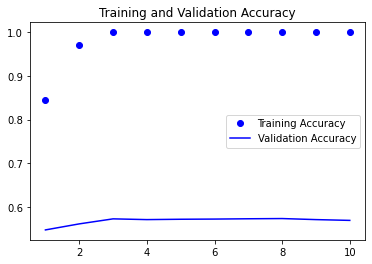

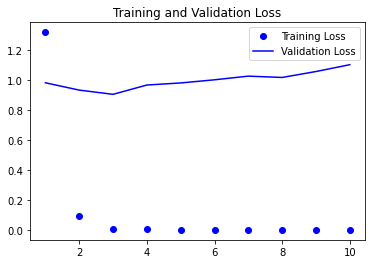

In [36]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()